In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.7268 - accuracy: 0.3579 - val_loss: 1.3350 - val_accuracy: 0.5137
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.2078 - accuracy: 0.5726 - val_loss: 1.1265 - val_accuracy: 0.6022
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0310 - accuracy: 0.6373 - val_loss: 1.0398 - val_accuracy: 0.6375
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9193 - accuracy: 0.6755 - val_loss: 0.9717 - val_accuracy: 0.6636
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8476 - accuracy: 0.7010 - val_loss: 0.9721 - val_accuracy: 0.6726
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7862 - accuracy: 0.7244 - val_loss: 0.9005 - val_accuracy: 0.6961
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7359 - accuracy: 0.7428 - val_loss: 0.8581 -

313/313 - 3s - loss: 0.8771 - accuracy: 0.7203


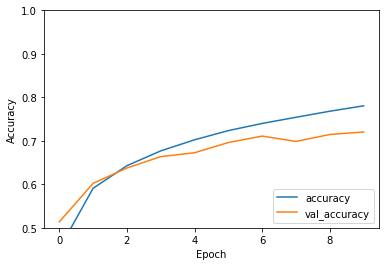

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.720300018787384
